<h2>Explanation of Parameters and Outputs</h2>

<details>
  <summary><strong>1. Parameters</strong></summary>
  <ul>
    <li><strong>START_DATE = '2023-01-01'</strong>: This is the date from which historical price data will be downloaded. You can change this to any other start date in the format 'YYYY-MM-DD'.</li>
    <li><strong>ROLLING_WINDOW_100 = 50</strong>: This defines the window (in days) used to calculate the rolling (moving) average. It computes the average of the adjusted closing prices over the previous 50 days for every day in the data.</li>
    <li><strong>BOLLINGER_WINDOW = 20</strong>: The Bollinger Bands calculation uses a 20-day rolling window to calculate the moving average and standard deviation. This is a common default for Bollinger Bands, but it can be adjusted.</li>
    <li><strong>MEAN_REVERT_WINDOW = 60</strong>: This is the window used to calculate the mean-reverting level of the stock/crypto price, set to 60 days (about 3 months of trading days).</li>
    <li><strong>STD_MULTIPLIER = 2.5</strong>: This multiplier defines how wide the Bollinger Bands are. It takes the 20-day standard deviation and multiplies it by 2.5 to calculate the upper and lower bands.</li>
    <li><strong>THRESHOLD = 0.05</strong>: The threshold defines how much the price needs to deviate from the mean-reverting level (in this case, by 5%) to trigger a buy or sell signal.</li>
  </ul>
</details>

<details>
  <summary><strong>2. Adjusted Close Price with Bollinger Bands & Mean Reverting Level</strong></summary>
  <ul>
    <li><strong>Adjusted Close Price</strong>: The daily adjusted closing price of the stock or cryptocurrency. It reflects price after adjustments like dividends or stock splits.</li>
    <li><strong>50-Day Moving Average</strong>: This is a moving average calculated over the last 50 days (or whatever value you set for <code>ROLLING_WINDOW_100</code>). It helps smooth out price fluctuations to show the general trend.</li>
    <li><strong>Upper and Lower Bollinger Bands</strong>: These bands represent the range within which the price typically stays. The upper band is 2.5 standard deviations above the moving average, and the lower band is 2.5 standard deviations below.</li>
    <li><strong>Mean Reverting Level</strong>: The 60-day moving average (set by <code>MEAN_REVERT_WINDOW</code>) shows where the price "should" revert to if it strays too far. A price significantly above or below this level could indicate overbought/oversold conditions.</li>
    <li><strong>Buy Signals</strong>: Green <code>^</code> markers on the chart indicate a buy signal, which happens when the price falls 5% (or whatever <code>THRESHOLD</code> is set to) below the mean-reverting level.</li>
    <li><strong>Sell Signals</strong>: Red <code>v</code> markers on the chart indicate a sell signal, which happens when the price rises 5% (or whatever <code>THRESHOLD</code> is set to) above the mean-reverting level.</li>
  </ul>
</details>

<details>
  <summary><strong>3. Daily Returns Chart</strong></summary>
  <ul>
    <li><strong>Daily Returns</strong>: This chart shows the percentage change in the adjusted close price from the previous day. Positive values indicate a gain, and negative values indicate a loss.</li>
    <li><strong>How to Interpret</strong>: Use this chart to identify trends or sudden volatility in the asset's price. Consistent positive returns suggest growth, while negative returns indicate declines.</li>
  </ul>
</details>

<details>
  <summary><strong>4. Buy/Sell Signals</strong></summary>
  <ul>
    <li>After the charts are plotted, the last 20 days of buy/sell signals are printed in the console. For each day, it shows:
      <ul>
        <li><strong>Adjusted Close Price</strong></li>
        <li><strong>Mean Reverting Level</strong></li>
        <li><strong>Buy/Sell/Hold Signal</strong>: Indicates whether the asset is in a buy, sell, or hold condition based on its deviation from the mean-reverting level.</li>
      </ul>
    </li>
  </ul>
</details>

<details>
  <summary><strong>5. Standard Deviation (Bollinger Band)</strong></summary>
  <ul>
    <li>The script prints the standard deviation of the Bollinger Bands for the last 3 months (20-day window). Higher values indicate higher volatility, while lower values indicate more price stability.</li>
  </ul>
</details>

<details>
  <summary><strong>6. How to Download Data for Bitcoin and Other Assets</strong></summary>
  <ul>
    <li><strong>For Bitcoin</strong>: Use the ticker <code>BTC-USD</code> to fetch historical data for Bitcoin in USD.</li>
    <li><strong>For Ethereum</strong>: Use the ticker <code>ETH-USD</code> to fetch historical data for Ethereum.</li>
    <li><strong>For Other Cryptos</strong>: You can use similar tickers like <code>LTC-USD</code> for Litecoin, etc.</li>
    <li><strong>For Stocks</strong>: Use traditional stock tickers like <code>AAPL</code> for Apple, <code>TSLA</code> for Tesla, etc.</li>
  </ul>
</details>


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


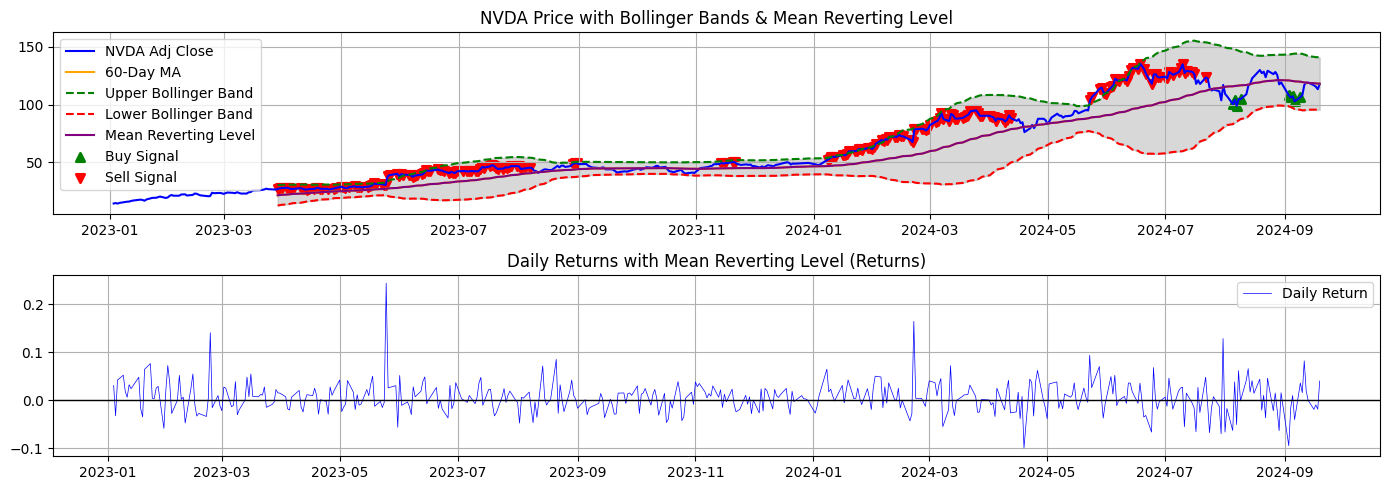

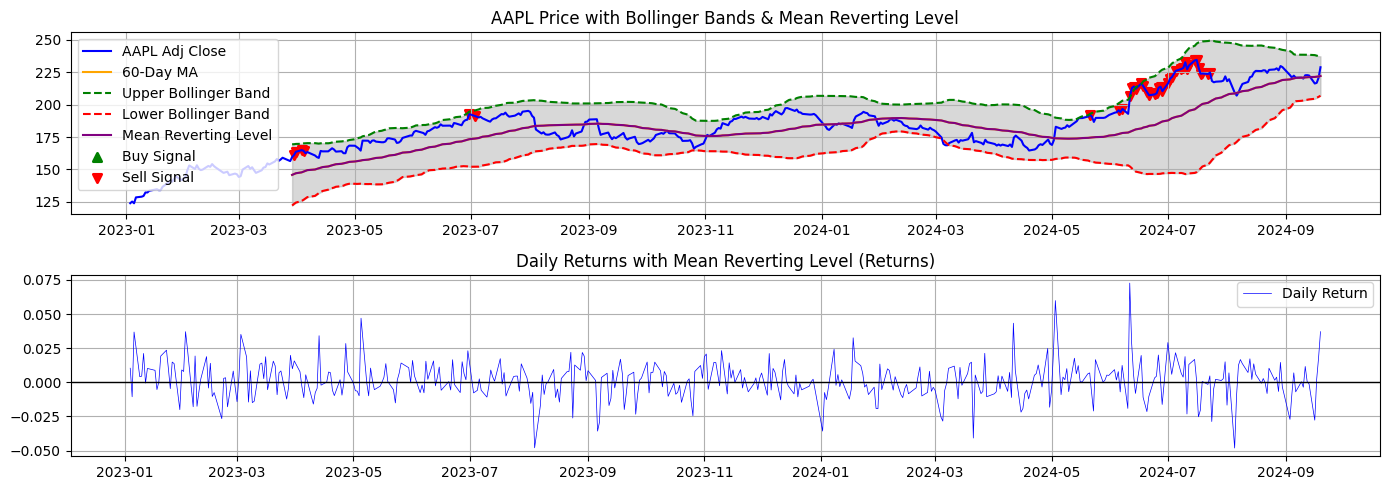

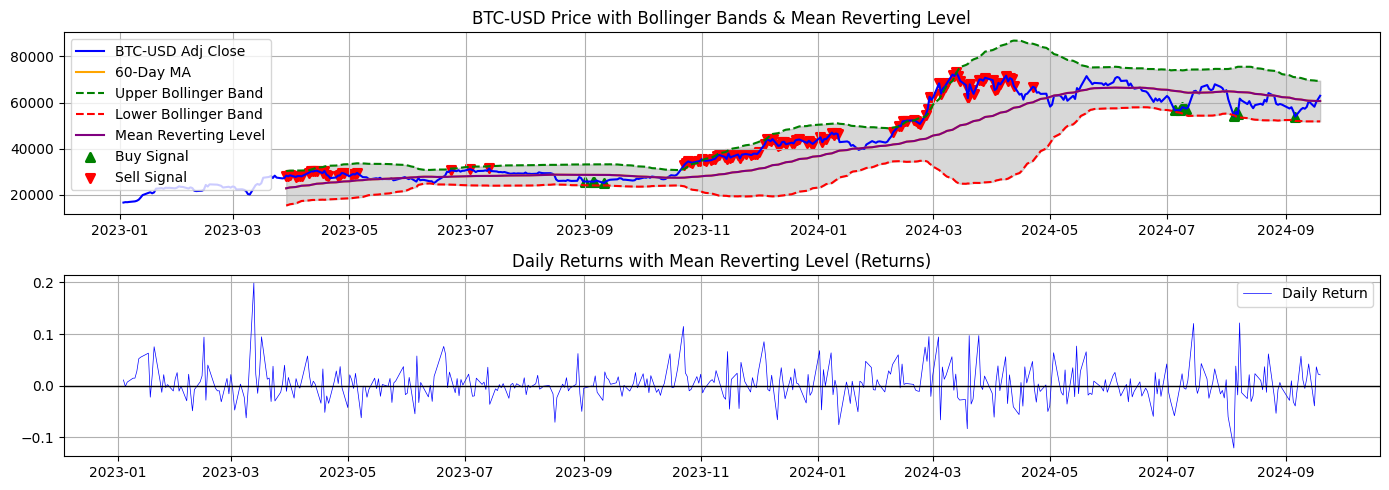

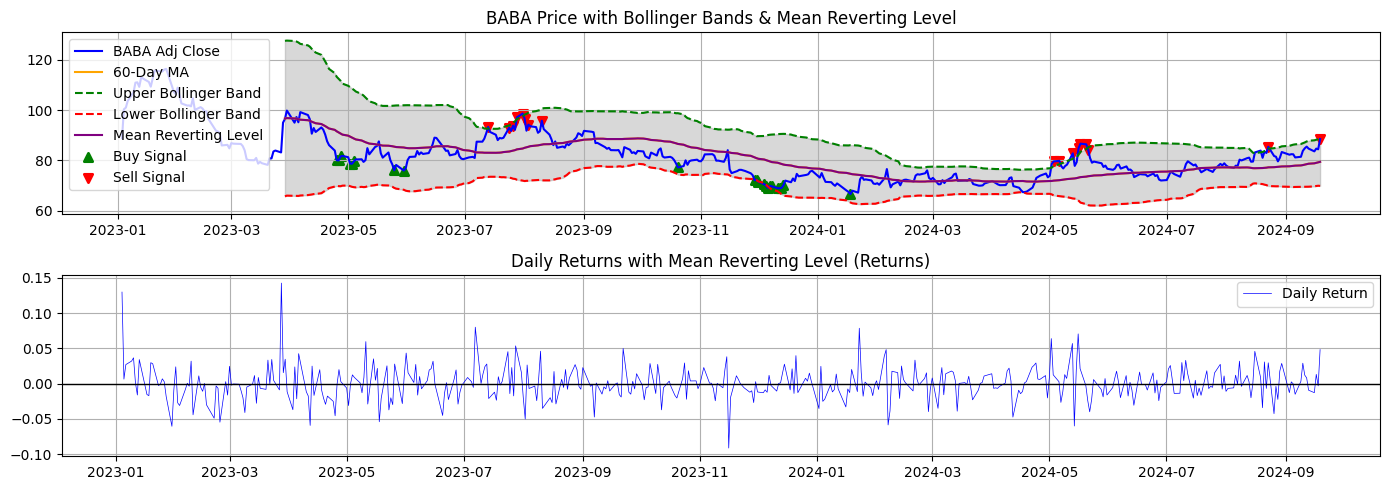

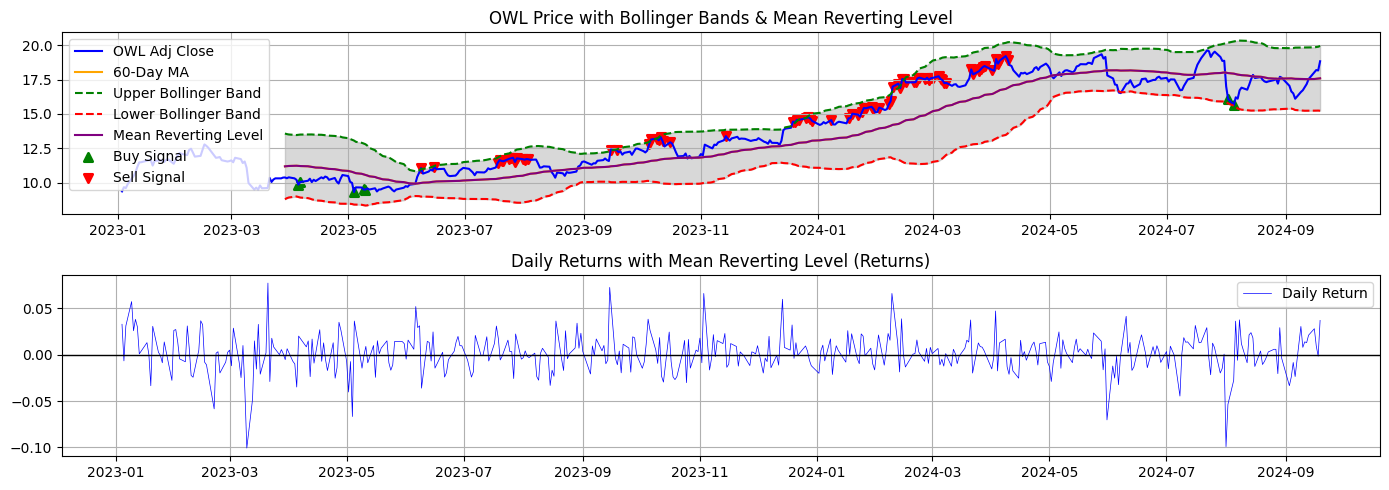

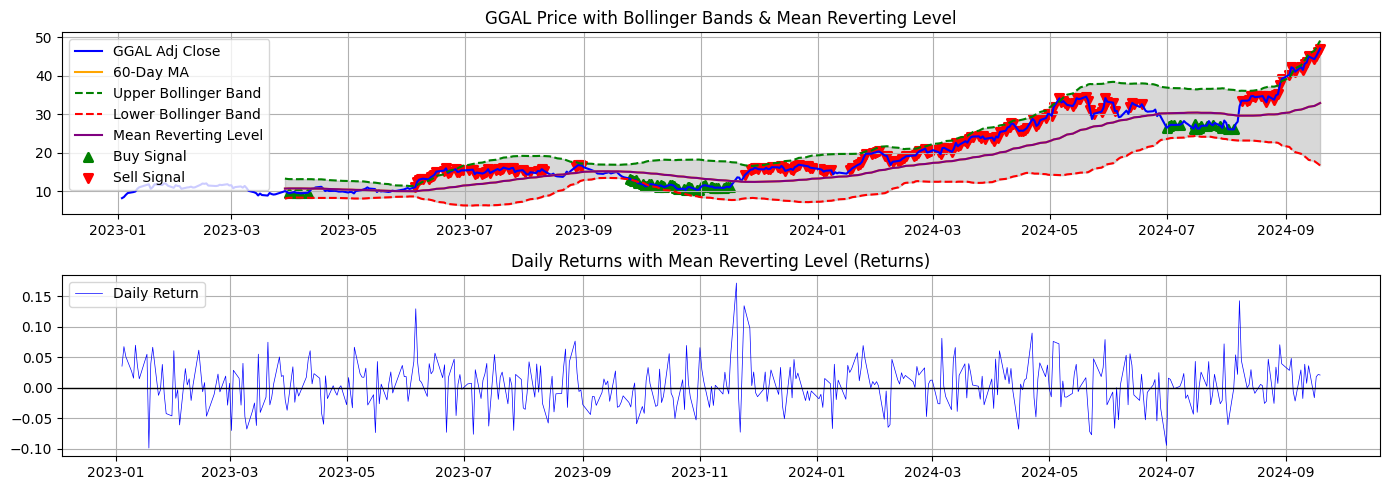

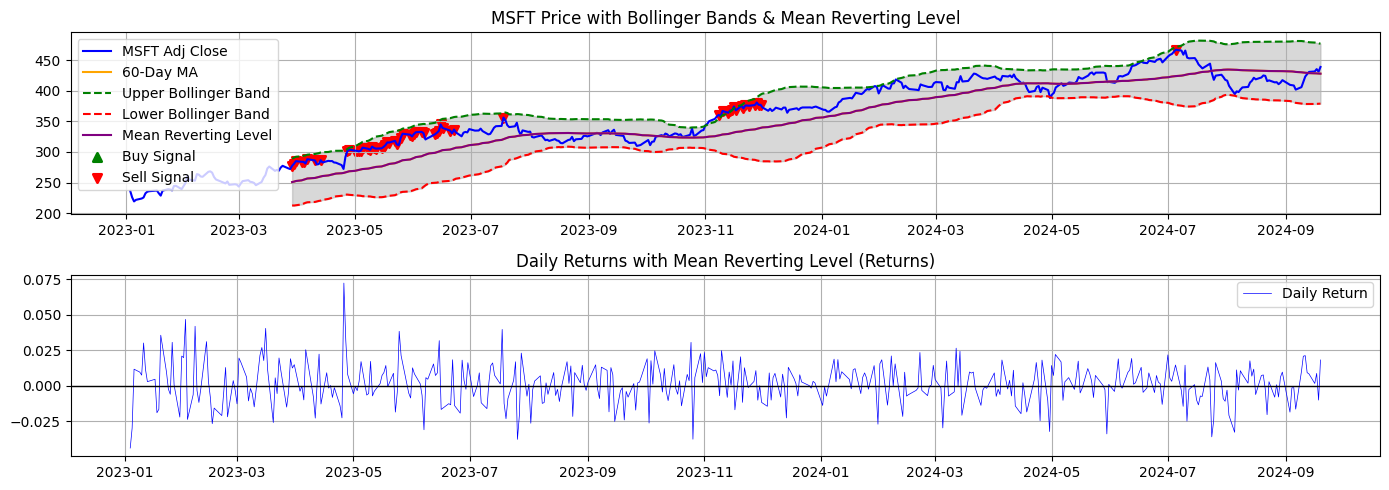

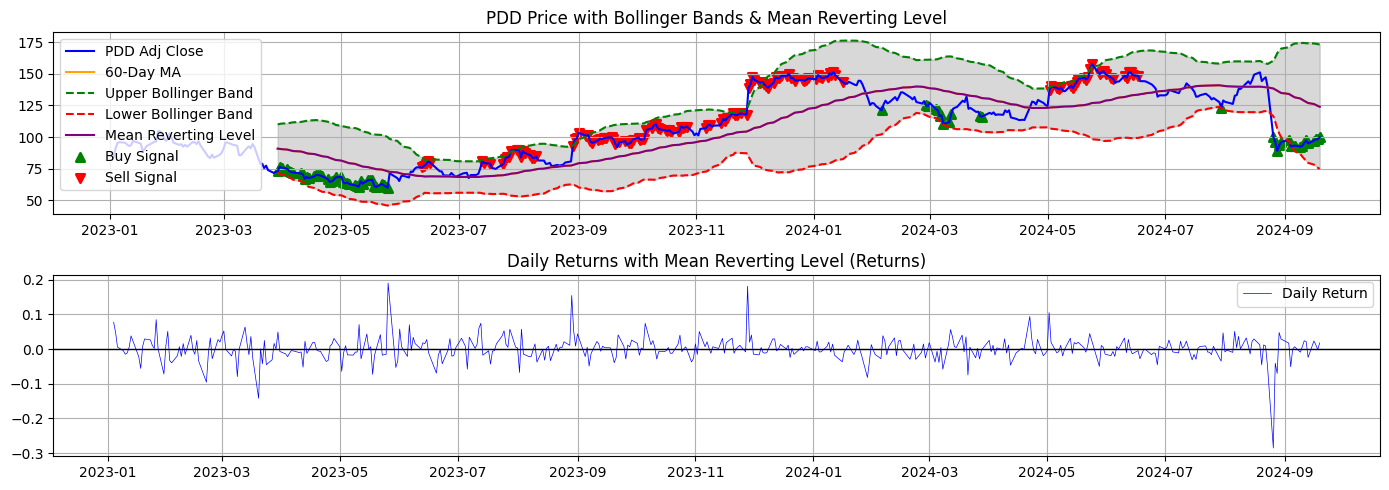

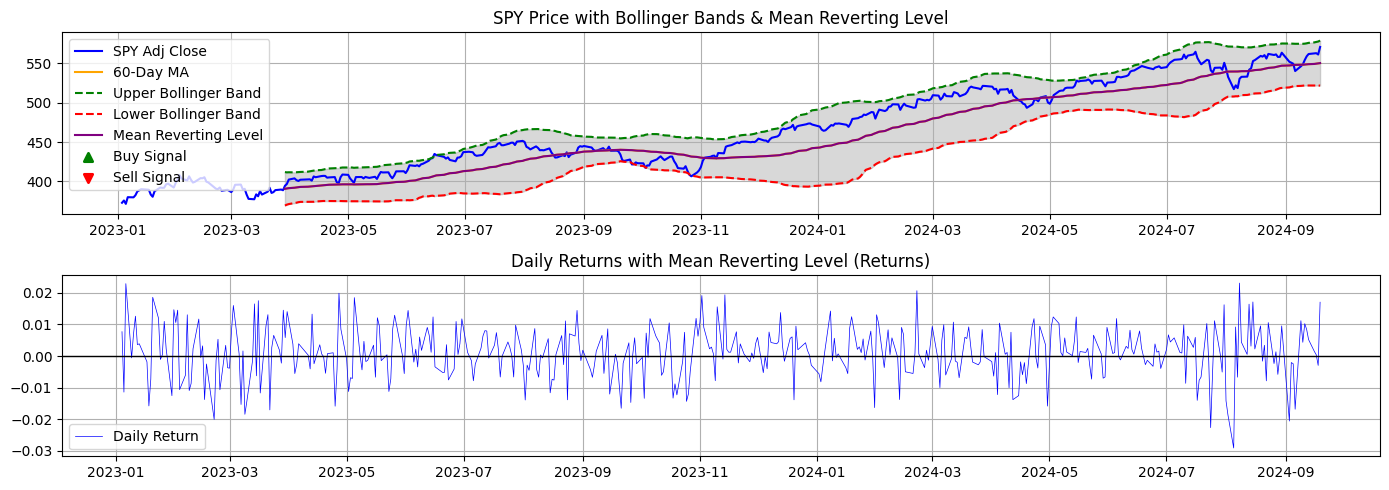

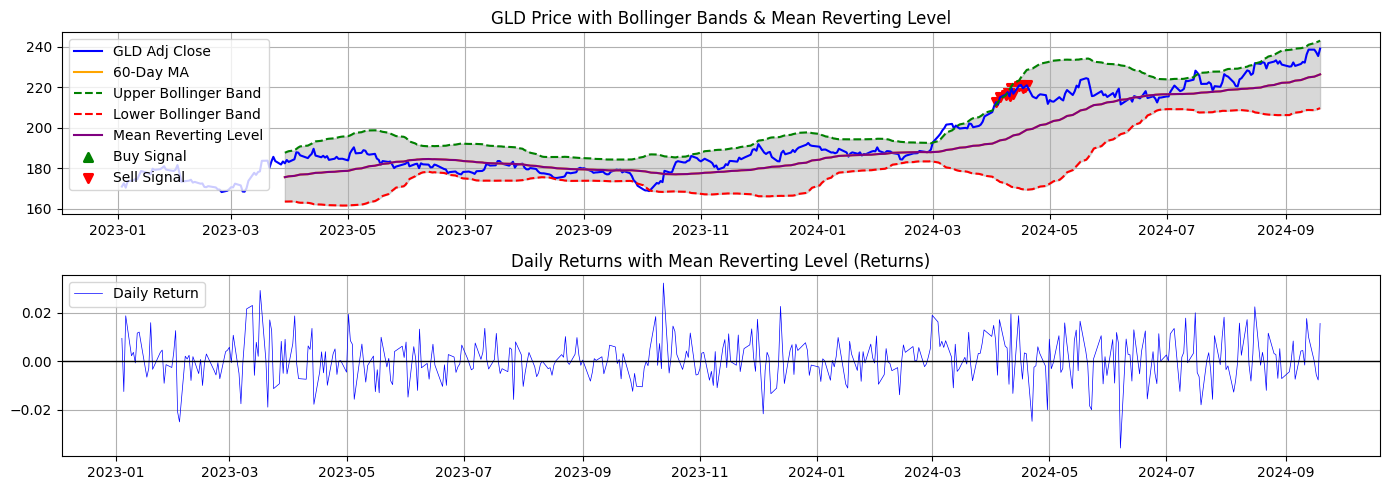

,Adj Close,Mean_Reverting_Level,Signal,Ticker
Date,,,,
2024-08-22,123.729416,120.225125,Hold,NVDA
2024-08-23,129.358932,120.467678,Hold,NVDA
2024-08-26,126.449181,120.733807,Hold,NVDA
2024-08-27,128.289032,121.045047,Hold,NVDA
2024-08-28,125.599258,121.222022,Hold,NVDA
...,...,...,...,...
2024-09-13,238.679993,224.992167,Hold,GLD
2024-09-16,238.660004,225.333833,Hold,GLD
2024-09-17,237.339996,225.709833,Hold,GLD


Correlation Matrix:


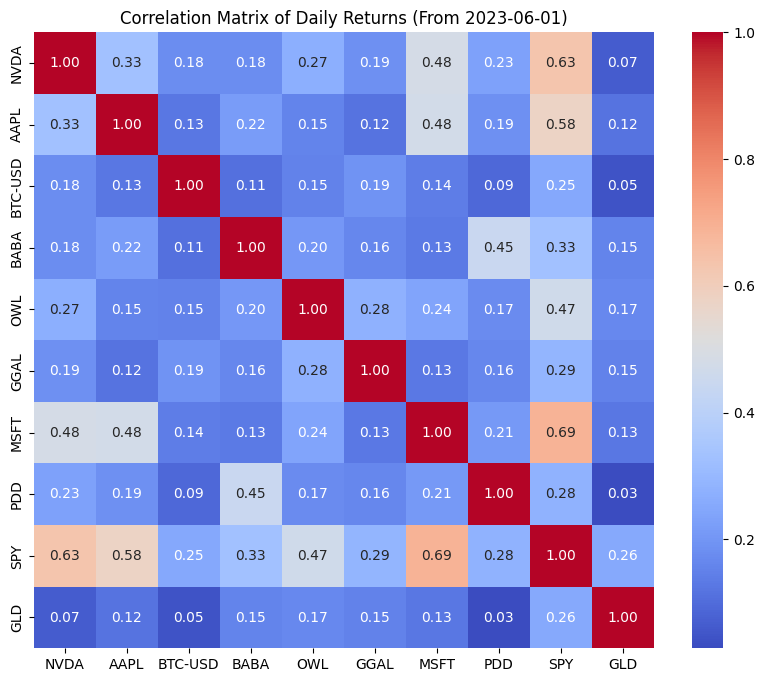

In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Parameters
START_DATE = '2023-01-01'  # Start date for individual stock analysis
CORR_START_DATE = '2023-06-01'  # Start date for correlation matrix and further analysis
ROLLING_WINDOW_100 = 60
BOLLINGER_WINDOW = 60
MEAN_REVERT_WINDOW = 60
STD_MULTIPLIER = 2.5
THRESHOLD = 0.10

# Function to fetch data from Yahoo Finance for multiple tickers
def fetch_data(tickers, start_date):
    # Create an empty DataFrame to hold adjusted close prices
    adj_close_prices = pd.DataFrame()

    # Loop through each ticker and fetch the adjusted close prices
    for ticker in tickers:
        data = yf.download(ticker, start=start_date)
        adj_close_prices[ticker] = data['Adj Close']

    return adj_close_prices

# Function to analyze a single asset and return its signal DataFrame
def analyze_asset(data, ticker):
    # Calculate indicators
    data['Daily_Return'] = data['Adj Close'].pct_change()
    data['100_MA'] = data['Adj Close'].rolling(window=ROLLING_WINDOW_100).mean()
    data['20_MA'] = data['Adj Close'].rolling(window=BOLLINGER_WINDOW).mean()
    data['20_STD'] = data['Adj Close'].rolling(window=BOLLINGER_WINDOW).std()
    data['Upper_Band'] = data['20_MA'] + (STD_MULTIPLIER * data['20_STD'])
    data['Lower_Band'] = data['20_MA'] - (STD_MULTIPLIER * data['20_STD'])

    # Calculate mean-reverting level for price
    data['Mean_Reverting_Level'] = data['Adj Close'].rolling(window=MEAN_REVERT_WINDOW).mean()

    # Buy/Sell signals based on price deviation from the mean-reverting level
    data['Signal'] = np.where(data['Adj Close'] < (1 - THRESHOLD) * data['Mean_Reverting_Level'], 'Buy',
                              np.where(data['Adj Close'] > (1 + THRESHOLD) * data['Mean_Reverting_Level'], 'Sell', 'Hold'))

    # Extract the last 20 buy/sell signals and add the ticker to the DataFrame
    signal_df = data[['Adj Close', 'Mean_Reverting_Level', 'Signal']].tail(20)
    signal_df['Ticker'] = ticker

    # Plotting
    fig, axs = plt.subplots(2, 1, figsize=(14, 5))

    # Chart 1: Adjusted Close, MA, and Bollinger Bands
    axs[0].plot(data.index, data['Adj Close'], label=f'{ticker} Adj Close', color='blue')
    axs[0].plot(data.index, data['100_MA'], label=f'{ROLLING_WINDOW_100}-Day MA', color='orange')
    axs[0].plot(data.index, data['Upper_Band'], label='Upper Bollinger Band', linestyle='--', color='green')
    axs[0].plot(data.index, data['Lower_Band'], label='Lower Bollinger Band', linestyle='--', color='red')
    axs[0].plot(data.index, data['Mean_Reverting_Level'], label='Mean Reverting Level', color='purple')
    axs[0].fill_between(data.index, data['Upper_Band'], data['Lower_Band'], color='gray', alpha=0.3)
    buy_signals = data[data['Signal'] == 'Buy']
    sell_signals = data[data['Signal'] == 'Sell']
    axs[0].scatter(buy_signals.index, buy_signals['Adj Close'], marker='^', color='green', label='Buy Signal', lw=2)
    axs[0].scatter(sell_signals.index, sell_signals['Adj Close'], marker='v', color='red', label='Sell Signal', lw=2)
    axs[0].set_title(f'{ticker} Price with Bollinger Bands & Mean Reverting Level')
    axs[0].legend()
    axs[0].grid(True)

    # Chart 2: Daily Returns with Mean Reverting Level (Returns)
    axs[1].plot(data.index, data['Daily_Return'], label='Daily Return', color='blue', lw=0.5)
    axs[1].set_title('Daily Returns with Mean Reverting Level (Returns)')
    axs[1].axhline(0, color='black', lw=1)
    axs[1].grid(True)
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    return signal_df

# Function to calculate and display the correlation matrix
def calculate_correlation_matrix(adj_close_prices, corr_start_date):
    # Filter data starting from the correlation start date
    adj_close_prices = adj_close_prices[adj_close_prices.index >= corr_start_date]

    # Calculate daily returns
    daily_returns = adj_close_prices.pct_change().dropna()

    # Calculate the correlation matrix
    correlation_matrix = daily_returns.corr()

    # Display the correlation matrix
    print("Correlation Matrix:")


    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Daily Returns (From ' + corr_start_date + ')')
    plt.show()

# Main function to run the analysis
def main():
    # List of tickers to analyze
    tickers = ['NVDA', 'AAPL', 'BTC-USD', 'BABA', 'OWL', 'GGAL', 'MSFT', 'PDD','SPY', 'GLD']

    # Fetch data (starting from a general start date for individual stock analysis)
    adj_close_prices = fetch_data(tickers, START_DATE)

    # Create an empty DataFrame to store the signal data for all tickers
    all_signals_df = pd.DataFrame()

    # Analyze each asset and collect signals
    for ticker in tickers:
        data = pd.DataFrame(adj_close_prices[ticker])
        data.columns = ['Adj Close']  # Rename the column for easier reference
        signal_df = analyze_asset(data, ticker)
        all_signals_df = pd.concat([all_signals_df, signal_df])

    # Display the last 20 buy/sell signals for all stocks
    display(all_signals_df)

    # Calculate and display the correlation matrix using a separate start date for correlation
    calculate_correlation_matrix(adj_close_prices, CORR_START_DATE)

# Run the main function
if __name__ == '__main__':
    main()



In [24]:
import yfinance as yf
import pandas as pd
import numpy as np

# Function to calculate performance metrics for a list of tickers
def calculate_performance_metrics(tickers, start_date, risk_free_rate=0.01):
    # Fetch S&P 500 total return data (for beta and correlation calculation)
    sp500 = yf.download('^GSPC', start=start_date)['Adj Close']
    sp500_returns = sp500.pct_change().dropna()

    metrics = []  # List to store the metrics for each ticker
    price_data = pd.DataFrame()  # To store daily adjusted close prices for all tickers and S&P 500

    # Add S&P 500 to the price data
    price_data['S&P 500'] = sp500

    for ticker in tickers:
        # Fetch historical data for the ticker
        data = yf.download(ticker, start=start_date)
        adj_close = data['Adj Close']

        # Calculate daily returns
        daily_returns = adj_close.pct_change().dropna()

        # Align the ticker's returns with the S&P 500 returns
        aligned_returns = pd.concat([daily_returns, sp500_returns], axis=1, join='inner').dropna()
        aligned_returns.columns = ['Ticker_Returns', 'SP500_Returns']

        # Geometric Annualized Return (compounded returns)
        cumulative_return = (1 + aligned_returns['Ticker_Returns']).prod()  # Compound all daily returns
        n_days = len(aligned_returns['Ticker_Returns'])  # Number of days in the dataset
        annualized_return = cumulative_return**(252 / n_days) - 1

        # Annualized standard deviation (volatility)
        annualized_std = aligned_returns['Ticker_Returns'].std() * np.sqrt(252)

        # Maximum drawdown
        rolling_max = adj_close.cummax()
        daily_drawdown = adj_close / rolling_max - 1.0
        max_drawdown = daily_drawdown.min()

        # Correlation with S&P 500
        correlation_with_sp500 = aligned_returns['Ticker_Returns'].corr(aligned_returns['SP500_Returns'])

        # Beta to S&P 500
        cov_matrix = np.cov(aligned_returns['Ticker_Returns'], aligned_returns['SP500_Returns'])
        beta = cov_matrix[0, 1] / cov_matrix[1, 1]

        # Sharpe ratio
        excess_return = aligned_returns['Ticker_Returns'] - risk_free_rate / 252
        sharpe_ratio = np.sqrt(252) * (excess_return.mean() / excess_return.std())

        # Sortino ratio
        downside_returns = aligned_returns['Ticker_Returns'][aligned_returns['Ticker_Returns'] < 0]
        sortino_ratio = np.sqrt(252) * (excess_return.mean() / downside_returns.std())

        # Store metrics in a dictionary and append it to the list
        metrics.append({
            'Ticker': ticker,
            'Annualized Return': annualized_return,
            'Annualized Volatility (Std Dev)': annualized_std,
            'Max Drawdown': max_drawdown,
            'Correlation with S&P 500': correlation_with_sp500,
            'Beta (S&P500)': beta,
            'Sharpe Ratio': sharpe_ratio,
            'Sortino Ratio': sortino_ratio
        })

        # Add ticker data to the price_data DataFrame
        price_data[ticker] = adj_close

    # Convert metrics list to a DataFrame for better readability
    metrics_df = pd.DataFrame(metrics)

    return metrics_df, price_data

# Function to apply nice formatting to the performance metrics DataFrame
def format_performance_metrics(metrics_df):
    # Formatting percentages and limiting decimal places
    formatted_df = metrics_df.style.format({
        'Annualized Return': '{:.1%}',  # Format as percentage with 1 decimal
        'Annualized Volatility (Std Dev)': '{:.1%}',  # Format as percentage with 1 decimal
        'Max Drawdown': '{:.2f}',  # Two decimal points
        'Correlation with S&P 500': '{:.2f}',  # Two decimal points
        'Beta (S&P500)': '{:.2f}',  # Two decimal points
        'Sharpe Ratio': '{:.2f}',  # Two decimal points
        'Sortino Ratio': '{:.2f}'  # Two decimal points
    })

    # Add more subtle background gradients for better visualization
    formatted_df = formatted_df.background_gradient(
        subset=['Annualized Return'], cmap='Greens', low=0.1, high=0.9
    ).background_gradient(
        subset=['Annualized Volatility (Std Dev)'], cmap='Blues', low=0.1, high=0.9
    ).background_gradient(
        subset=['Max Drawdown'], cmap='Reds', low=0.1, high=0.9
    ).background_gradient(
        subset=['Sharpe Ratio', 'Sortino Ratio'], cmap='Oranges', low=0.1, high=0.9
    )

    return formatted_df

# Example usage
tickers = ['NVDA', 'AAPL', 'BTC-USD', 'BABA', 'OWL', 'GGAL', 'MSFT', 'PDD']

CORR_START_DATE = '2010-01-01'  # Define the start date
performance_metrics_df, daily_price_data = calculate_performance_metrics(tickers, CORR_START_DATE)

# Apply formatting to the performance metrics DataFrame
formatted_performance_metrics = format_performance_metrics(performance_metrics_df)

# Display the nicely formatted DataFrame
formatted_performance_metrics


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Ticker,Annualized Return,Annualized Volatility (Std Dev),Max Drawdown,Correlation with S&P 500,Beta (S&P500),Sharpe Ratio,Sortino Ratio
0,NVDA,46.7%,45.6%,-0.66,0.62,1.64,1.04,1.57
1,AAPL,27.5%,28.0%,-0.44,0.69,1.11,0.97,1.36
2,BTC-USD,46.7%,62.7%,-0.83,0.22,0.76,0.91,1.22
3,BABA,-0.3%,41.3%,-0.80,0.42,0.97,0.17,0.27
4,OWL,21.3%,41.3%,-0.51,0.54,1.32,0.65,0.92
5,GGAL,17.3%,55.4%,-0.92,0.39,1.24,0.56,0.78
6,MSFT,22.0%,25.7%,-0.37,0.76,1.12,0.87,1.21
7,PDD,24.0%,75.0%,-0.87,0.29,1.06,0.64,0.99
